In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
img1_path = "image1.jpg"
img2_path = "image2.jpg"

In [13]:
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

In [14]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

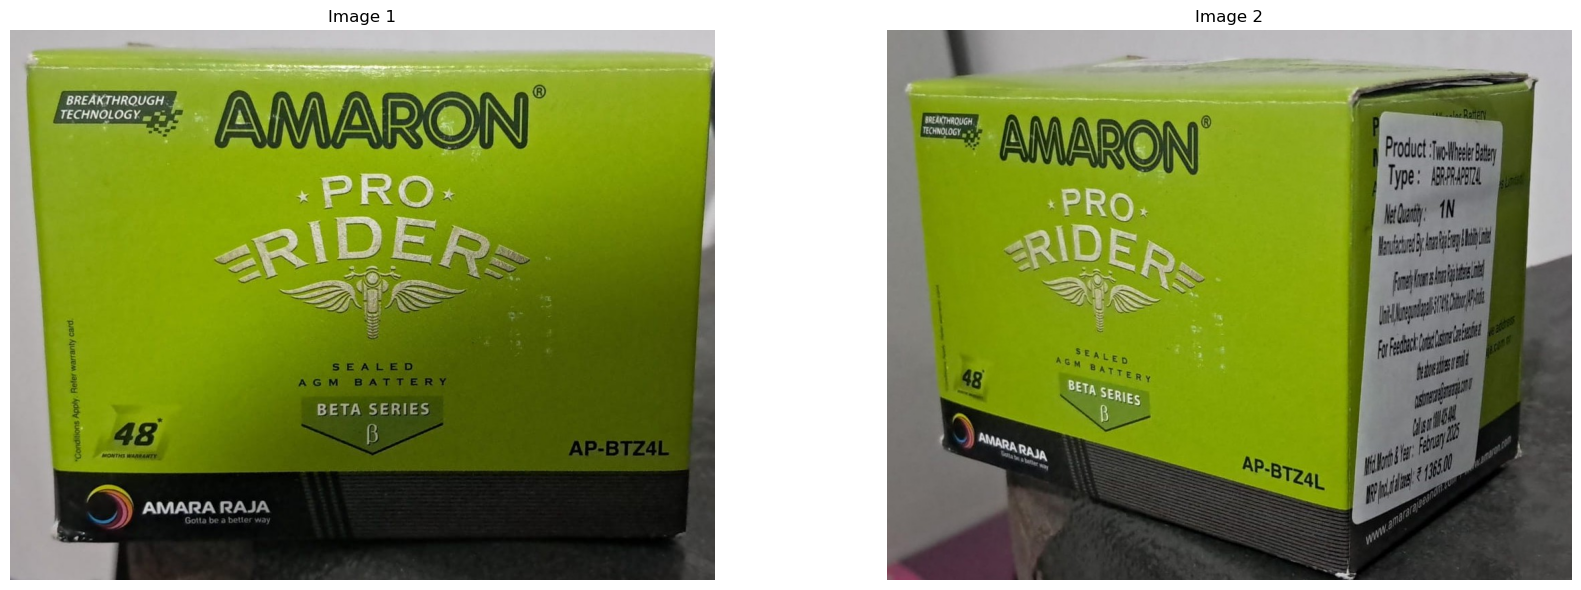

In [15]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()

### SIFT Feature Matching

In [16]:

def sift(img1_path, img2_path, n_features = 0, contrastThreshold = 0.04, edgeThreshold = 10, sigma = 1.6):
    
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    sift = cv2.SIFT_create(nfeatures = n_features, 
                           contrastThreshold = contrastThreshold, 
                           edgeThreshold = edgeThreshold, 
                           sigma = sigma)
    
    # Detect keypoints and compute descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    print(f"Keypoints in Image 1: {len(kp1)}")
    print(f"Keypoints in Image 2: {len(kp2)}")

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    print(f"Good Matches: {len(good_matches)}")

    match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(12, 6))
    plt.imshow(match_img)
    plt.title("Matched Keypoints")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

Keypoints in Image 1: 2822
Keypoints in Image 2: 4172
Good Matches: 292


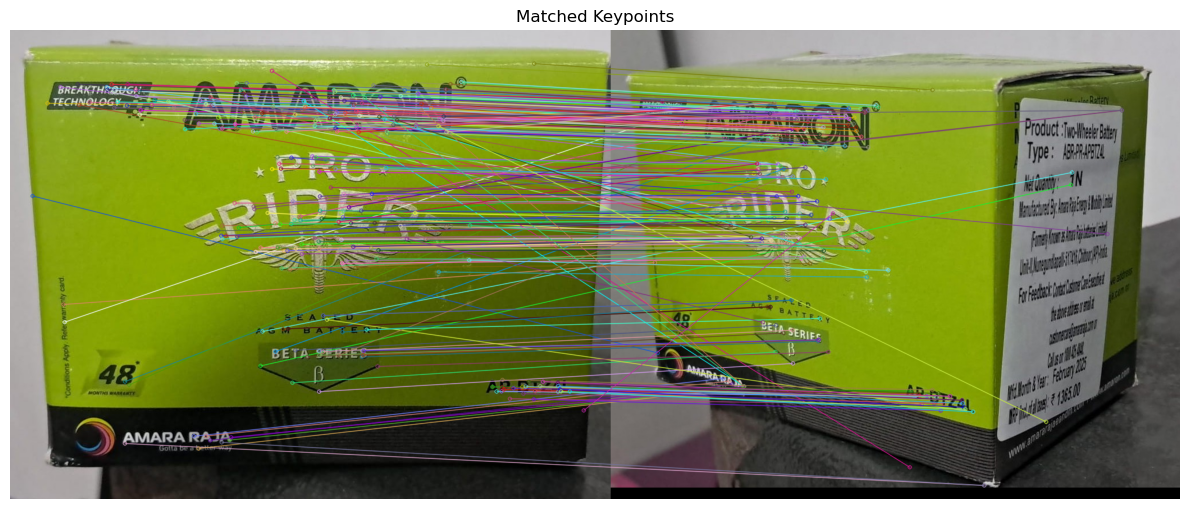

In [17]:
sift(img1_path, img2_path)

Keypoints in Image 1: 200
Keypoints in Image 2: 200
Good Matches: 9


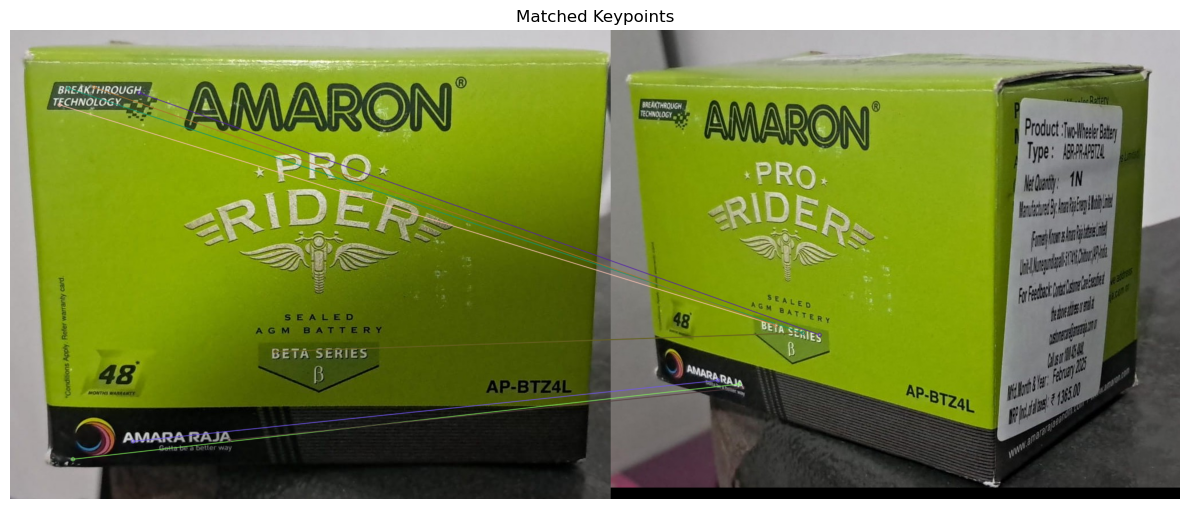

In [18]:
# Reduce features and increase contrast threshold
sift(img1_path, img2_path, n_features = 200, contrastThreshold = 0.08)

#### By limiting the number of features to 200 and increasing the contrast threshold, fewer keypoints were detected, especially in low-contrast areas. This resulted in faster computation and more prominent keypoints being prioritized. However, some fine matches were lost due to the aggressive filtering.

Keypoints in Image 1: 3780
Keypoints in Image 2: 5298
Good Matches: 362


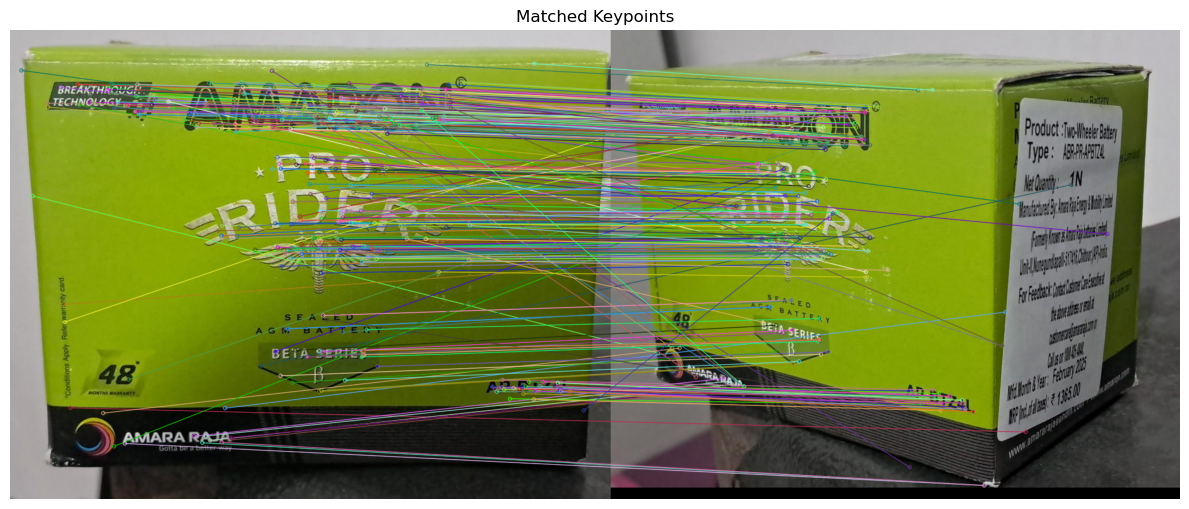

In [19]:
# Increase edge threshold to ignore fine edges
sift(img1_path, img2_path, edgeThreshold = 20)

#### Raising the edge threshold allowed SIFT to ignore edge-like structures, reducing false keypoints along textured borders. This improved the robustness of matches but slightly reduced the total number of detected keypoints. It helped focus on more stable and distinct features.

Keypoints in Image 1: 1624
Keypoints in Image 2: 1912
Good Matches: 204


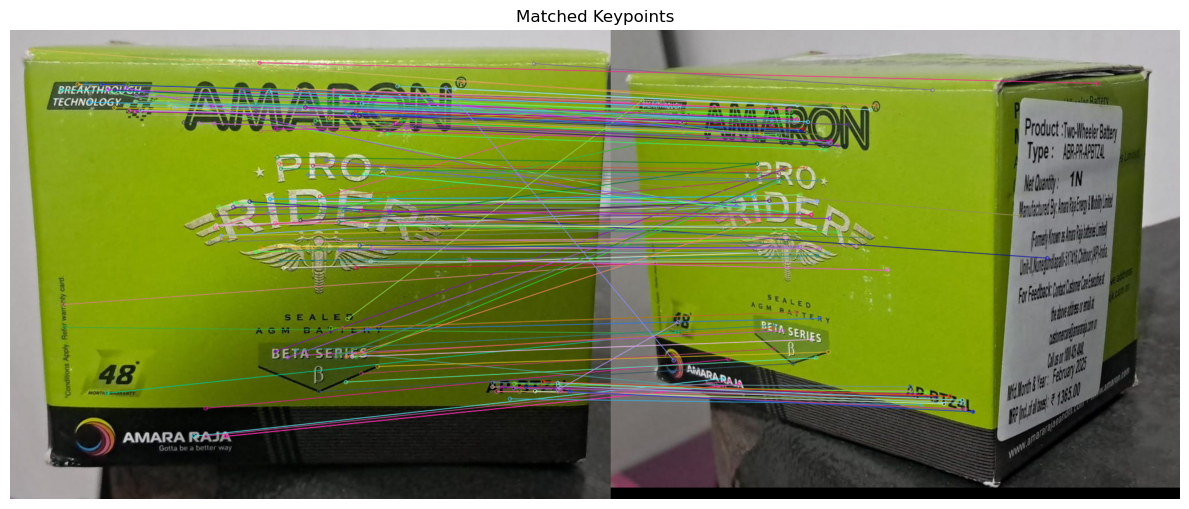

In [20]:
# Modify sigma to affect blur applied
sift(img1_path, img2_path, sigma=2.0)

#### Increasing the sigma value caused more blurring before difference-of-Gaussian computation, making the algorithm capture broader structures instead of fine details. Keypoints were fewer but more scale-invariant. This is useful for detecting larger features but may miss fine texture matches.